In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt
import scipy.misc

In [4]:
# coin flipping experiment
k_actual = 63
n = 100

# null hypothesis
q = 0.5

In [5]:
# let's simulate this experiment under the null hypothesis
coin_flips = np.random.rand(100000, n) < q
coin_flips.shape

(100000, 100)

In [6]:
n_heads = coin_flips.sum(axis=1) # sum over the n coin flips in each experiment
n_heads.shape

(100000,)

(array([   37.,   550.,  3800., 13694., 28019., 29826., 17522.,  5529.,
          920.,   103.]),
 array([30., 34., 38., 42., 46., 50., 54., 58., 62., 66., 70.]),
 <a list of 10 Patch objects>)

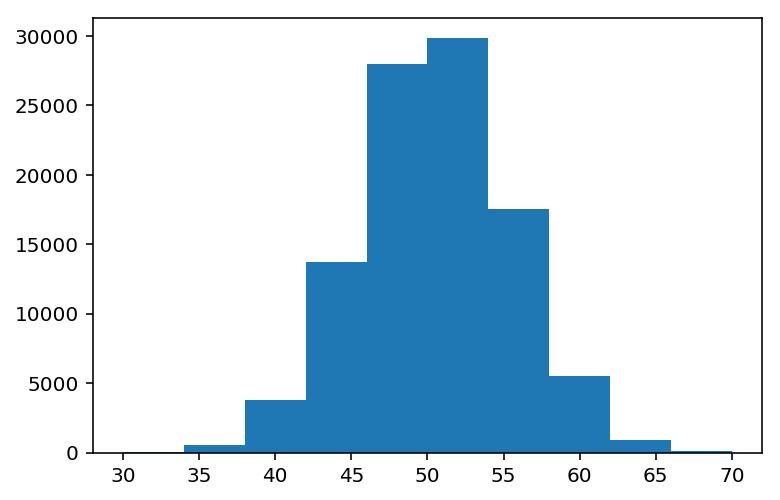

In [7]:
plt.hist(n_heads) # by default plt.hist uses 10 bins

In [8]:
plt.hist? # let's look at the "bins" parameter

In [11]:
np.arange(n + 2) - 0.5

array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
        17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
        26.5,  27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,
        35.5,  36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,
        44.5,  45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,
        53.5,  54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,
        62.5,  63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,
        71.5,  72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,
        80.5,  81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,
        89.5,  90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,
        98.5,  99.5, 100.5])

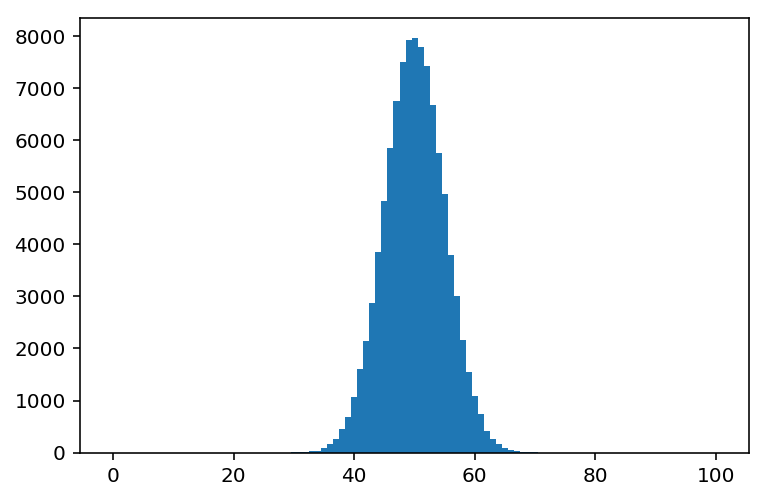

In [13]:
plt.hist(n_heads, bins=np.arange(n + 2) - 0.5);

In [14]:
n_heads[:20]

array([50, 56, 45, 46, 45, 44, 46, 45, 53, 40, 48, 61, 55, 49, 49, 52, 50,
       48, 50, 53])

In [18]:
# compute the p-value

# how many simulations had at least 63 heads?
print((n_heads >= 63).sum())

# how many simulations had at most 37 heads?
print((n_heads <= 37).sum())

# what's the probability of seeing a result _at least as weird_ as 63 heads in 100 flips?
p_simulation = ((n_heads >= 63).sum() + (n_heads <= 37).sum()) / 100000
print(p_simulation)

599
587
0.01186


In [19]:
# let's do a test with the analytic binomial distribution
ks = np.arange(n + 1)

binom_k = (q ** ks) * ((1 - q) ** (n - ks)) * scipy.misc.comb(n, ks)

/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.


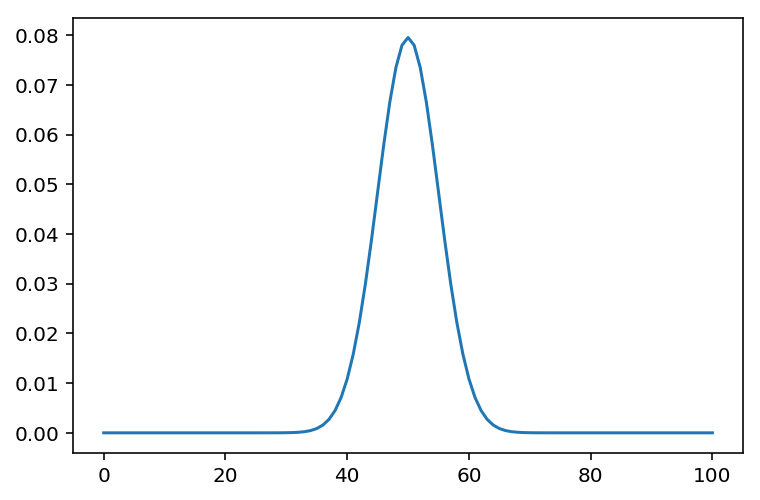

In [20]:
plt.plot(ks, binom_k)

In [21]:
# what is the probability of seeing 60 heads in 100 flips?
binom_k[60]

0.010843866711637984

In [23]:
# probability of seeing at least 63 heads in 100 flips
binom_k[63:].sum()

0.006016487862681737

In [26]:
# probability of seeing at most 37 heads
binom_k[:37].sum() # not quite

binom_k[:38].sum()

0.006016487862681738

In [27]:
# what's the probability of seeing a result at least as weird as 63 heads?
p_binom = binom_k[63:].sum() + binom_k[:38].sum()
print(p_binom)

0.012032975725363475


In [28]:
# built-in binomial test
import scipy.stats

In [29]:
scipy.stats.binom_test?

In [30]:
scipy.stats.binom_test(63, 100, 0.5)

0.012032975725363472

In [31]:
## mean vs. median

data = np.array([-4, 7, 8, 13, 2, 0, 9])

In [32]:
data.mean()

5.0

In [33]:
np.median(data)

7.0

In [34]:
# if we change one of the numbers to something ludicrously large
data2 = data.copy()
data2[3] = 1000000000
print(data2)

[        -4          7          8 1000000000          2          0
          9]


In [35]:
data2.mean() # this affects the mean a lot!

142857146.0

In [36]:
np.median(data2) # but doesn't affect the median at all, because it is more *robust*

7.0